In [1]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../python-ml-course-master/datasets/ecom-expense/Ecom Expense.csv')

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df['Gender'],prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'],prefix='City')

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
colunm_names=df.columns.values.tolist()
colunm_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new=df[colunm_names].join(dummy_gender)
colunm_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new=df_new[colunm_names].join(dummy_city_tier)
colunm_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3','Record']

In [11]:
X = df_new[feature_cols]
Y = df_new['Total Spend']

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589615),
 ('Gender_Female', -131.02501325554607),
 ('Gender_Male', 131.02501325554613),
 ('City_Tier 1', 76.76432601049524),
 ('City_Tier 2', 55.138974309232566),
 ('City_Tier 3', -131.9033003197279),
 ('Record', 772.2334457445644)]

In [15]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
* Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648
    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [16]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [17]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [18]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [19]:
SSD

1517733985.3408163

In [20]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [21]:
RSE

803.1318809818165

In [22]:
sales_mean=np.mean(df_new["Total Spend"])

In [23]:
sales_mean

6163.176415976714

In [24]:
error = RSE/sales_mean

In [25]:
error*100

13.031135680294161

## Eliminar variables dummy redundantes

In [26]:
dummy_gender = pd.get_dummies(df['Gender'],prefix='Gender').iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [27]:
dummy_city_tier = pd.get_dummies(df['City Tier'],prefix='City').iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [28]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names=df_new.columns.values.tolist()
df_new =df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [29]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

## Transformacion de variables para conseguir una relacion no lineal

In [31]:
import pandas as pd

In [32]:
data_auto = pd.read_csv('../python-ml-course-master/datasets/auto/auto-mpg.csv')
data_auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [33]:
data_auto.shape

(406, 9)

In [34]:
import matplotlib.pyplot as plt

Text(0.5,1,'CV vs MPG')

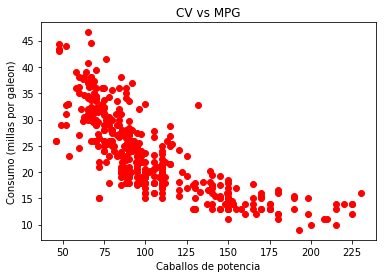

In [35]:
%matplotlib inline
data_auto['mgp']=data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'],data_auto['mpg'],'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo (millas por galeon)')
plt.title('CV vs MPG')

## Modelo de regresion lineal
#### mpg = a+b*horsepower

In [42]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data=X[:,np.newaxis]

In [43]:
lm = LinearRegression()
lm.fit(X[:, np.newaxis],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

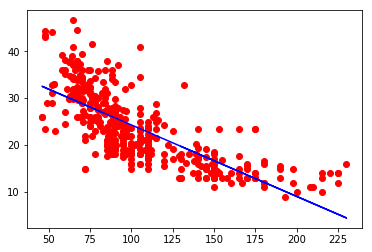

In [44]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X_data),color='blue')

In [45]:
lm.score(X_data,Y)

0.574653340645025

In [47]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD,RSE,y_mean,error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

## Modelo de regresion cuadraticp
#### mpg = a+b*horsepower^2

In [48]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [50]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lm.score(X_data,Y)

0.4849887034823205

In [54]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD,RSE,y_mean,error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de regresion cuadraticp
#### mpg = a+b*horsepower + c*horsepower^2

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [58]:
poly = PolynomialFeatures(degree=2)

In [59]:
X_data=poly.fit_transform(X[:,np.newaxis])

In [60]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
lm.score(X_data,Y)

0.6439066584257467

In [62]:
lm.intercept_

55.02619244708116

In [63]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.434*hp + 0.00112615*hp^2

In [87]:
for  d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data=poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print('Regresion de grado '+str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    print(regression_validation(X_data, Y, lm.predict(X_data)))

Regresion de grado 2
0.6439066584257467
55.02619244708116
[ 0.         -0.43404318  0.00112615]
8636.180643524503 4.61778115803654 23.51457286432162 19.63795466190689
None
Regresion de grado 3
0.6444678885560744
58.44877411167289
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
8622.56936742855 4.614140736300908 23.51457286432162 19.622473106036676
None
Regresion de grado 4
0.6467674189704502
40.0966438558909
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
8566.799832491353 4.5991947315797574 23.51457286432162 19.55891250126878
None
Regresion de grado 5
0.6547512491370207
-40.694028616702454
[ 0.00000000e+00  4.00021893e+00 -7.54802466e-02  6.19621640e-04
 -2.36220984e-06  3.41983153e-09]
8373.171388777962 4.5469217341231944 23.51457286432162 19.336612067583776
None


In [86]:
def regression_validation(X_data,Y, Y_pred):
    
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print(SSD,RSE,y_mean,error*100)